<span style="color:Gray"><i>Exercise 29</i></span>

# Artificial Intelligence w Marketingu Bankowym – Naive Bayes Classifier part 4

### Naive Bayes Classifier
Naiwny Bayes to prosta technika konstruowania klasyfikatorów: modele, które przypisują etykiety klas do wystąpień problemowych, reprezentowane jako wektory wartości cech , w których etykiety klas są rysowane z pewnego zbioru skończonego. Nie istnieje jeden algorytm do szkolenia takich klasyfikatorów, ale rodzina algorytmów oparta na wspólnej zasadzie: wszystkie naiwne klasyfikatory Bayesa zakładają, że wartość określonej cechy jest niezależna od wartości innej cechy, biorąc pod uwagę zmienną klasy. Na przykład owoc można uznać za jabłko, jeśli jest czerwone, okrągłe i ma około 10 cm średnicy. Naiwny klasyfikator Bayesa uważa, że każda z tych cech przyczynia się niezależnie do prawdopodobieństwa, że ​​ten owoc jest jabłkiem, niezależnie od wszelkich możliwychkorelacje między kolorem, okrągłością i średnicą.

W przypadku niektórych rodzajów modeli prawdopodobieństwa naiwnych klasyfikatorów Bayesa można bardzo skutecznie trenować w nadzorowanym środowisku uczenia się . W wielu praktycznych zastosowaniach estymacja parametrów dla naiwnych modeli Bayesa wykorzystuje metodę maksymalnego prawdopodobieństwa ; innymi słowy, można pracować z naiwnym modelem Bayesa bez akceptacji prawdopodobieństwa bayesowskiego lub przy użyciu jakichkolwiek metod bayesowskich.

Pomimo naiwnego projektu i pozornie uproszczonych założeń, naiwne klasyfikatory Bayesa działały całkiem dobrze w wielu złożonych rzeczywistych sytuacjach. W 2004 r. Analiza problemu klasyfikacji bayesowskiej wykazała, że ​​istnieją uzasadnione teoretyczne powody pozornie nieprawdopodobnej skuteczności naiwnych klasyfikatorów Bayesa. [6] Jednak kompleksowe porównanie z innymi algorytmami klasyfikacji w 2006 r. Wykazało, że klasyfikacja Bayesa jest lepsza niż inne podejścia, takie jak wzmocnione drzewa lub losowe lasy . [7]

Zaletą naiwnych Bayesa jest to, że wymaga jedynie niewielkiej liczby danych treningowych do oszacowania parametrów niezbędnych do klasyfikacji.
źródło: https://en.wikipedia.org/wiki/Naive_Bayes_classifier


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
import matplotlib.pylab as plt
from pylab import plot, show, subplot, specgram, imshow, savefig
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import Imputer

import matplotlib.pyplot as plote

%matplotlib inline

plt.style.use('ggplot')

df = pd.read_csv('c:/1/bank.csv')
df.head()

#  <span style="color:darkRED"> Jak w praktyce zastosować Naive Bayes Classifier w marketingu bankowym?
</span>

Departament marketingu bankowego niedawno przeprowadził akcję promocyjną. Klienci byli zachęcani do skorzystania z oferty banku - zaciągania kredytów w rachunku bieżącym. Cała operacja została skrupulatnie odnotowana w formie tabeli danych. Tabelę danych można znaleźć pod adresem:  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/

### Dane klienta banku

<span style="color:green"><b>age:</b></span> (numerycznie)

<span style="color:green"><b>job:</b></span> rodzaj pracy (kategorycznie: „admin.”, „Pracownik fizyczny”, „przedsiębiorca”, „pokojówka”, „zarządzanie”, „emerytowany”, „samozatrudniony”, „ usługi ”,„ student ”,„ technik ”,„ bezrobotny ”,„ nieznany ”)

<span style="color:green"><b> marital:</b></span> stan cywilny (kategorycznie:„ rozwiedziony ”,„ żonaty ”,„ samotny ”,„ nieznany ”; uwaga:„ rozwiedziony ”oznacza rozwiedziony lub owdowiały)

<span style="color:green"><b> education: </b></span>(kategoryczne: „podstawowy. 4 lata”, „podstawowy. 6 lat”, „podstawowy. 9 lat”, „szkoła średnia”, „analfabeta”, „kurs zawodowy”, „uniwersytet. stopień”, „nieznane”)

<span style="color:green"><b> default:</b></span> czy kredyt jest niespłacony? (kategorycznie: „nie”, „tak”, „nieznany”)

<span style="color:green"><b> housing:</b></span> ma kredyt mieszkaniowy? (kategorycznie: „nie”, „tak”, „nieznany”) 

<span style="color:green"><b> loan:</b> </span>czy pożyczka osobista? (kategorycznie: „nie”, „tak”, „nieznany”)
Powiązane z ostatnim kontaktem bieżącej kampanii

<span style="color:green"><b> contact:</b></span> typ komunikacji kontaktowej (kategorycznie: „komórkowy”, „telefon”)

<span style="color:green"><b> month:</b></span>ostatni miesiąc kontaktowy w roku (kategorycznie: „jan”, „lut”, „mar”, ..., „lis”, „dec”)

<span style="color:green"><b> day_of_week:</b></span> ostatni dzień tygodnia w tygodniu (kategorycznie: „pon”, „wt”, „środ”, „czw”, „pt”)

<span style="color:green"><b> duration: </b></span>czas trwania ostatniego kontaktu, w sekundach (numerycznie) . Ważna uwaga: ten atrybut ma duży wpływ na docelowy wynik (np. Jeśli czas trwania = 0, to y = „nie”). Jednak czas trwania nie jest znany przed wykonaniem połączenia. Ponadto po zakończeniu połączenia y jest oczywiście znane. W związku z tym dane te należy uwzględnić wyłącznie do celów porównawczych i należy je odrzucić, jeżeli intencją jest stworzenie realistycznego modelu predykcyjnego.
Inne atrybuty

<span style="color:green"><b> campaign:</b></span> liczba kontaktów wykonanych podczas tej kampanii i dla tego klienta (numerycznie, obejmuje ostatni kontakt)

<span style="color:green"><b> pdays:</b></span> liczba dni, które upłynęły od ostatniego kontaktu klienta z poprzedniej kampanii (numerycznie; 999 oznacza, że klient nie był wcześniej skontaktowano się)

<span style="color:green"><b> previous:</b></span> liczba kontaktów wykonanych przed tą kampanią i dla tego klienta (numerycznie)

<span style="color:green"><b> poutcome:</b></span>wynik poprzedniej kampanii marketingowej (kategorycznie: „porażka”, „nieistniejąca”, „sukces”)
Atrybuty kontekstu społecznego i gospodarczego

<span style="color:green"><b> emp.var.rate: </b></span>wskaźnik zmienności zatrudnienia - wskaźnik kwartalny (liczbowy)

<span style="color:green"><b> Cons.price.idx: </b></span>wskaźnik cen konsumpcyjnych - wskaźnik miesięczny (liczbowy)

<span style="color:green"><b> cons.conf.idx: </b></span>wskaźnik zaufania konsumentów - wskaźnik miesięczny (liczbowy )

<span style="color:green"><b> euribor3 mln: </b></span>stawka 3-miesięczna euribor - wskaźnik dzienny (liczbowy)

<span style="color:green"><b> nr_employed: </b></span>liczba zatrudnionych: liczba pracowników - wskaźnik kwartalny (liczbowy)

In [3]:
df = pd.read_csv('c:/1/bank.csv')

In [3]:
df.shape

(41188, 23)

Sprawdzamy czy baza zawiera komórki puste, Naive Bayes Classifier nie działa gdy baza zawiera komórki puste.

In [4]:
df.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

Brak komórek pustych w rejestrze bankowym.

In [5]:
df.head()

,Unnamed: 0,Unnamed: 0.1,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,0,0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,1,1,53,technician,married,unknown,no,no,no,cellular,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,2,2,28,management,single,university.degree,no,yes,no,cellular,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,3,3,39,services,married,high.school,no,no,no,cellular,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,4,4,55,retired,married,basic.4y,no,yes,no,cellular,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


Kasujemy z rejestru następujące klumny:

<span style="color:blue">Usuwam kolumny: 'day_of_week','month','previous','campaign','duration', 'contact', 'y'</span>

In [47]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx',
       'euribor3m', 'nr_employed', 'y', 'ResultTH09', 'ResultTH08',
       'ResultTH07', 'ResultTH06', 'ResultTH05', 'ResultTH04', 'ResultTH03',
       'ResultTH02', 'Customer_classification'],
      dtype='object')

In [6]:
df = df[['age', 'job', 'marital', 'education','default', 'housing', 'loan', 'poutcome', 'emp_var_rate','cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed','y']]

In [48]:
df.head(5)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,...,y,ResultTH09,ResultTH08,ResultTH07,ResultTH06,ResultTH05,ResultTH04,ResultTH03,ResultTH02,Customer_classification
0,44,1,1,0,1,2,0,1,1.4,93.444,...,0,0,0,0,0,0,0,0,0,0
1,53,9,1,7,0,0,0,1,-0.1,93.200,...,0,0,0,0,0,0,0,0,0,0
2,28,4,2,6,0,2,0,2,-1.7,94.055,...,1,1,1,1,1,1,1,1,1,8
3,39,7,1,3,0,0,0,1,-1.8,93.075,...,0,0,0,0,0,0,1,1,1,3
4,55,5,1,0,0,2,0,2,-2.9,92.201,...,1,1,1,1,1,1,1,1,1,8


# Tworzenie Dummy Variables
Naive Bayes Classifier działa na zmiennych numerycznych. Trzeba więc zamienić zmienne tekstowe na format numeryczny.

<span style="color:blue">Wyświetlamy kolumny zmiennnych dyskretnych</span>

In [10]:
df.describe(include=["object"]).columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'poutcome'],
      dtype='object')

In [11]:
list = ['job', 'marital', 'education', 'default', 'housing', 'loan','poutcome']

<span style="color:blue">Transforumjemy na dane dummy variables</span>

In [13]:
df[list] = df[list].apply(LabelEncoder().fit_transform)
df[list].head()

,job,marital,education,default,housing,loan,poutcome
0,1,1,0,1,2,0,1
1,9,1,7,0,0,0,1
2,4,2,6,0,2,0,2
3,7,1,3,0,0,0,1
4,5,1,0,0,2,0,2


<span style="color:blue">Dzielimy nowy zbiór df na zmienne opisujące i zmienną wynikową.</span>

In [14]:
y = df['y']
X = df.drop('y', axis=1) 

<span style="color:blue">Dzielimy zbiór df na zbiór testowy i zbiór treningowy.</span>

In [16]:
from sklearn.model_selection import train_test_split 
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.33, stratify = y, random_state = 148)

# <span style="color:blue">OVERSAMPLING </span>

Dla zbioru df bo zmienna wynikowa nie jest zbilansowana. Oversampling robimy na zmiennych treningowych.

In [49]:
df.y.value_counts(dropna = False, normalize=True)

0    0.887346
1    0.112654
Name: y, dtype: float64

In [50]:
Proporcja = sum(ytrain == 0) / sum(ytrain == 1) 
Proporcja = np.round(Proporcja, decimals=0)
Proporcja = Proporcja.astype(int)
print('Ile na jedną sybskrypcje przypada nieprzedłużonych subskrypcji:',Proporcja)

Ile na jedną sybskrypcje przypada nieprzedłużonych subskrypcji: 8


<span style="color:blue">Replikacja zmiennych wynikowych w zbiorze treningowym</span>

In [51]:
ytrain_pos_OVS = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
print('Ilość zmiennych wynikowych y  w zbiorze treningowym df po replikacji:' ,ytrain_pos_OVS.count())

Ilość zmiennych wynikowych y  w zbiorze treningowym df po replikacji: 24872


<span style="color:blue">Replikacja zmiennych niezależnych w zbiorze treningowym</span>

In [52]:
Xtrain_pos_OVS = pd.concat([Xtrain.loc[ytrain==1, :]] * Proporcja, axis = 0)

In [53]:
ytrain_pos_OVS = pd.concat([ytrain[ytrain==1]] * Proporcja, axis = 0) 
print('Ilość zmiennych niezależnychX  z zbiorze treningowym df po replikacji:')
Xtrain_pos_OVS.count()

Ilość zmiennych niezależnychX  z zbiorze treningowym df po replikacji:


age               24872
job               24872
marital           24872
education         24872
default           24872
housing           24872
loan              24872
poutcome          24872
emp_var_rate      24872
cons_price_idx    24872
cons_conf_idx     24872
euribor3m         24872
nr_employed       24872
dtype: int64

<span style="color:blue">Wprowadzenie nowych, zreplikowanych zmiennych do zbioru treningowego</span>

In [23]:
ytrain_OVS = pd.concat([ytrain, ytrain_pos_OVS], axis = 0).reset_index(drop = True)
Xtrain_OVS = pd.concat([Xtrain, Xtrain_pos_OVS], axis = 0).reset_index(drop = True)

<span style="color:blue">Sprawdzenie ilość wierszy w zbiorach przed i po oversampling</span>

In [24]:
print ('Zbiór X treningowy: ',Xtrain.shape)
print ('Zbiór X testowy:    ', Xtest.shape)
print ('Zbiór y treningowy: ', ytrain.shape)
print ('Zbiór y testowy:    ', ytest.shape)

Zbiór X treningowy:  (27595, 13)
Zbiór X testowy:     (13593, 13)
Zbiór y treningowy:  (27595,)
Zbiór y testowy:     (13593,)


In [25]:
Xtrain_OVS.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
0,49,1,1,2,1,0,0,1,1.4,94.465,-41.8,4.959,5228.1
1,38,9,0,6,1,0,0,1,1.4,93.444,-36.1,4.963,5228.1
2,42,0,0,6,0,0,0,1,1.4,94.465,-41.8,4.959,5228.1


# Naive Bayes Classifier na zbiorze df

In [54]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(Xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

<span style="color:blue">Podstawienie do wzoru</span>

In [55]:
y_pred = gnb.predict(Xtest)

<span style="color:blue">Blok diagnostyczny</span>

Recall Training data:      0.669
Precision Training data:   0.7853
----------------------------------------------------------------------
Recall Test data:          0.6571
Precision Test data:       0.2769
----------------------------------------------------------------------
Confusion Matrix Test data
[[9435 2627]
 [ 525 1006]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.78      0.86     12062
           1       0.28      0.66      0.39      1531

    accuracy                           0.77     13593
   macro avg       0.61      0.72      0.62     13593
weighted avg       0.87      0.77      0.80     13593



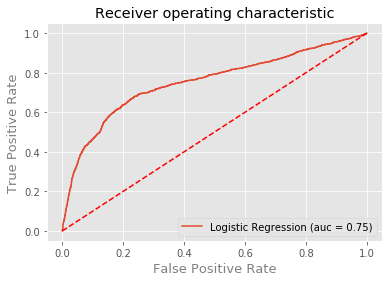

In [56]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

print("Recall Training data:     ", np.round(recall_score(ytrain_OVS, gnb.predict(Xtrain_OVS)), decimals=4))
print("Precision Training data:  ", np.round(precision_score(ytrain_OVS, gnb.predict(Xtrain_OVS)), decimals=4))
print("----------------------------------------------------------------------")
print("Recall Test data:         ", np.round(recall_score(ytest, gnb.predict(Xtest)), decimals=4)) 
print("Precision Test data:      ", np.round(precision_score(ytest, gnb.predict(Xtest)), decimals=4))
print("----------------------------------------------------------------------")
print("Confusion Matrix Test data")
print(confusion_matrix(ytest, gnb.predict(Xtest)))
print("----------------------------------------------------------------------")
print(classification_report(ytest, gnb.predict(Xtest)))
y_pred_proba = gnb.predict_proba(Xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)
plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend(loc=4)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

<span style="color:blue">Tworzenie listy dla kierownika marketingu</span>

In [37]:
print('Lista dla kierownika marketingu bankowego')
df3[df3['Wynik']==1].head(4)

Lista kierownika marketingu bankowego


,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,Wynik
17516,63,retired,married,professional.course,no,no,no,nonexistent,-1.8,93.075,-47.1,1.498,5099.1,1
3037,34,services,married,high.school,no,no,no,nonexistent,-1.8,93.075,-47.1,1.445,5099.1,1
37550,40,blue-collar,married,basic.9y,unknown,no,no,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,1
32961,46,technician,married,professional.course,no,yes,no,nonexistent,-1.8,92.893,-46.2,1.291,5099.1,1


<span style="color:blue">Statystyka </span>

# <span style="color:red">Threshold ROC curve </span>

# <span style="color:blue">Klasyfikacja dla progów od 0.2 do 0.9</span> Threshold ROC curve

In [30]:
gnb_ytest = gnb.predict_proba(X)[:, 1]

In [32]:
X.shape

(41188, 13)

<span style="color:blue">Klasyfikacja dla progów threshold = od 0.2 do 0.9</span>

In [38]:
y_predT09 = (gnb_ytest >= 0.9).astype(int)
df['ResultTH09'] = y_predT09

y_predT08 = (gnb_ytest >= 0.8).astype(int)
df['ResultTH08'] = y_predT08

y_predT07 = (gnb_ytest >= 0.7).astype(int)
df['ResultTH07'] = y_predT07

y_predT06 = (gnb_ytest >= 0.6).astype(int)
df['ResultTH06'] = y_predT06

y_predT05 = (gnb_ytest >= 0.5).astype(int)
df['ResultTH05'] = y_predT05

y_predT04 = (gnb_ytest >= 0.4).astype(int)
df['ResultTH04'] = y_predT04

y_predT03 = (gnb_ytest >= 0.3).astype(int)
df['ResultTH03'] = y_predT03

y_predT02 = (gnb_ytest >= 0.2).astype(int)
df['ResultTH02'] = y_predT02

In [39]:
df.head(3)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,...,nr_employed,y,ResultTH09,ResultTH08,ResultTH07,ResultTH06,ResultTH05,ResultTH04,ResultTH03,ResultTH02
0,44,1,1,0,1,2,0,1,1.4,93.444,...,5228.1,0,0,0,0,0,0,0,0,0
1,53,9,1,7,0,0,0,1,-0.1,93.200,...,5195.8,0,0,0,0,0,0,0,0,0
2,28,4,2,6,0,2,0,2,-1.7,94.055,...,4991.6,1,1,1,1,1,1,1,1,1


## <span style="color:blue">Punktacja dla każdego klienta</span>

In [57]:
df['Customer_classification']= df['ResultTH02']+df['ResultTH03']+df['ResultTH04']+df['ResultTH05']+df['ResultTH06']+df['ResultTH07']+df['ResultTH08']+df['ResultTH09']

In [60]:
df.sort_values('Customer_classification').head(4)

,age,job,marital,education,default,housing,loan,poutcome,emp_var_rate,cons_price_idx,...,y,ResultTH09,ResultTH08,ResultTH07,ResultTH06,ResultTH05,ResultTH04,ResultTH03,ResultTH02,Customer_classification
0,44,1,1,0,1,2,0,1,1.4,93.444,...,0,0,0,0,0,0,0,0,0,0
25048,30,9,1,6,0,2,0,1,-0.1,93.200,...,0,0,0,0,0,0,0,0,0,0
25047,35,1,0,2,1,2,0,1,1.4,93.918,...,0,0,0,0,0,0,0,0,0,0
25046,42,7,1,3,1,2,2,1,1.1,93.994,...,0,0,0,0,0,0,0,0,0,0


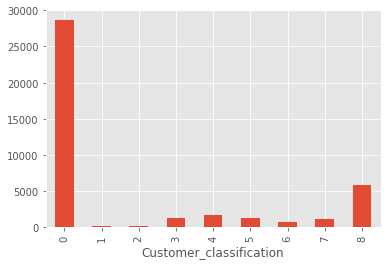

In [43]:
df.pivot_table(index =['Customer_classification'],values='marital', aggfunc='count').plot(kind='bar', legend=False)

In [61]:
df['ResultTH05'].value_counts(normalize=True)

0    0.737059
1    0.262941
Name: ResultTH05, dtype: float64

## Rozwiązanie

### <span style="color:darkblue">Porównaine Logistic Regression Classifier z Naive Bayes Classifier.</span>


### <span style="color:darkblue">Logistic Regression na zbiorze df</span>

                       precision    recall  f1-score   support

                   0       0.95      0.76      0.85     12062
                   1       0.27      0.68      0.38      1531

            accuracy                           0.75     13593
           macro avg       0.61      0.72      0.61     13593
        weighted avg       0.87      0.75      0.79     13593


### <span style="color:darkblue">Naive Bayes Classifier na zbiorze df</span>


                        precision    recall  f1-score   support

                   0       0.95      0.78      0.86     12062
                   1       0.28      0.66      0.39      1531

            accuracy                           0.77     13593
           macro avg       0.61      0.72      0.62     13593
        weighted avg       0.87      0.77      0.80     13593
